# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos bancarios de clientes para estimar el churn, es una métrica que indica a los clientes que cancelan el servicio en un determinado período.

El objetivo es utilizar la información de los datos para predecir si los clientes de un banco cancelarán el servicio.

Esta predicción se realizará mediante machine learning, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la lectura, análisis exploratorio, separación y transformación de los datos, hasta el ajuste, evaluación y comparación de modelos de clasificación.

# 1. Análisis exploratorio


Lectura de los datos con la biblioteca `pandas`.

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-es-cursos/2160-aprendiendo-a-clasificar-datos-con-ml/desafio/churn.csv'

In [ ]:
datos = pd.read_csv(url)
display(datos.head())

,id_cliente,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,15634602,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


Verificando que no haya datos nulos o faltantes para asegurar la calidad de los datos.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Eliminando la columna que no es relevante para el análisis.

In [ ]:
datos = datos.drop(['id_cliente'], axis=1)

## Explorando los datos

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(datos, x = 'churn', text_auto = True)

### Variables categóricas

In [ ]:
px.histogram(datos, x = 'miembro_activo', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos, x = 'tiene_tarjeta_credito', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(datos, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

### Variables numéricas

In [ ]:
px.box(datos, x = 'salario_estimado', color = 'churn')

In [ ]:
px.box(datos, x = 'servicios_adquiridos', color = 'churn')

In [ ]:
px.box(datos, x = 'saldo', color = 'churn')

In [ ]:
px.box(datos, x = 'edad', color = 'churn')

In [ ]:
px.box(datos, x = 'años_de_cliente', color = 'churn')

In [ ]:
px.box(datos, x = 'años_de_cliente', color = 'churn')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

In [ ]:
X = datos.drop('churn', axis = 1)
y = datos['churn']

## Transformando las variables explicativas


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columnas = X.columns

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['pais', 'sexo_biologico', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [ ]:
X = one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

## Transformando la variable respuesta


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

# 3.1 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

## Modelo de referencia - Baseline


In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7964

## Árboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_arbol = DecisionTreeClassifier(
    random_state=5,
    max_depth=4)




modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
modelo_arbol.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
modelo_arbol.score(X_test, y_test)

0.8464

Este puntaje evalúa qué tan bien el modelo generaliza a datos nuevos que no ha visto durante el entrenamiento. Los datos de prueba se utilizan para simular cómo se desempeñaría el modelo en el mundo real con datos desconocidos. Un puntaje más bajo en los datos de prueba en comparación con los datos de entrenamiento puede indicar que el modelo no generaliza bien y puede estar sobreajustado a los datos de entrenamiento.

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.9, 'x[7] <= 41.5\ngini = 0.324\nsamples = 7500\nvalue = [5972, 1528]\nclass = no'),
 Text(0.25, 0.7, 'x[10] <= 2.5\ngini = 0.196\nsamples = 5085\nvalue = [4524, 561]\nclass = no'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[10] <= 1.5\ngini = 0.174\nsamples = 4974\nvalue = [4495.0, 479.0]\nclass = no'),
 Text(0.0625, 0.3, 'x[0] <= 0.5\ngini = 0.259\nsamples = 2436\nvalue = [2064, 372]\nclass = no'),
 Text(0.03125, 0.1, 'gini = 0.217\nsamples = 1852\nvalue = [1623, 229]\nclass = no'),
 Text(0.09375, 0.1, 'gini = 0.37\nsamples = 584\nvalue = [441, 143]\nclass = no'),
 Text(0.1875, 0.3, 'x[9] <= 205892.859\ngini = 0.081\nsamples = 2538\nvalue = [2431, 107]\nclass = no'),
 Text(0.15625, 0.1, 'gini = 0.079\nsamples = 2534\nvalue = [2430, 104]\nclass = no'),
 Text(0.21875, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = si'),
 Text(0.375, 0.5, 'x[9] <= 23194.08\ngini = 0.386\nsamples = 111\nvalue = [29, 82]\nclass = si'),
 Text(0.3125, 0.3, 'x[11] <= 132695.484\n

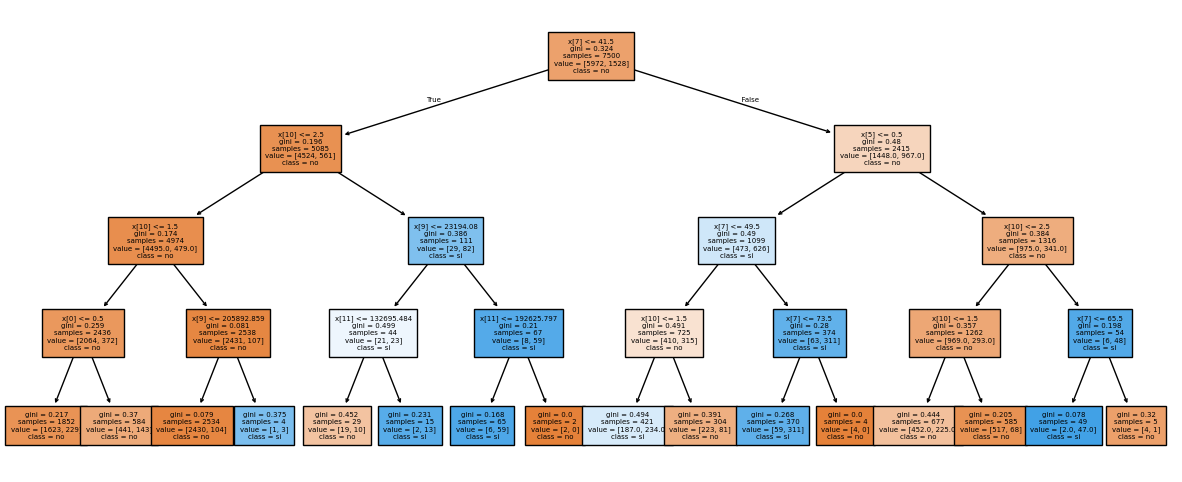

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['no', 'si'], fontsize = 5)

In [ ]:
print("Parameters of the Decision Tree model:")
print(modelo_arbol.get_params())

Parameters of the Decision Tree model:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 5, 'splitter': 'best'}


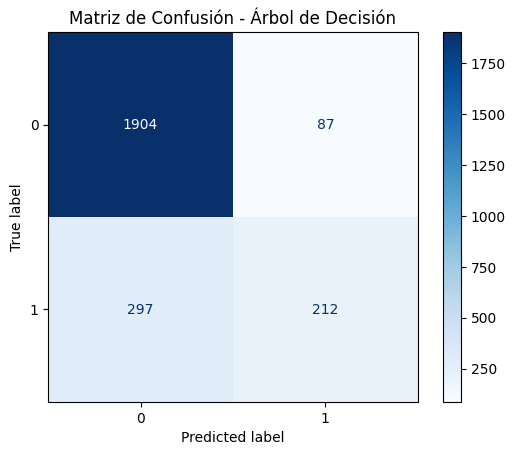

In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
from sklearn.metrics import ConfusionMatrixDisplay


y_pred = modelo_arbol.predict(X_test)
# Matriz de confusión

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

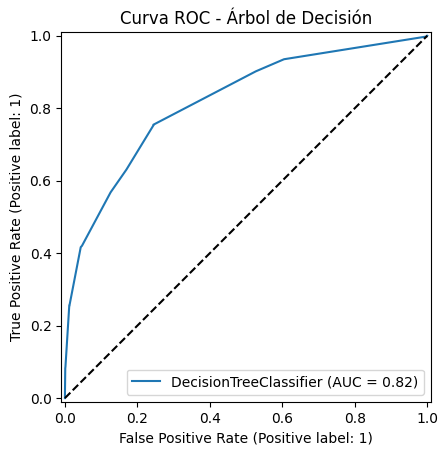

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Predicciones vs Reales - Árbol de Regresión")
plt.show()

/tmp/ipython-input-2264231683.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




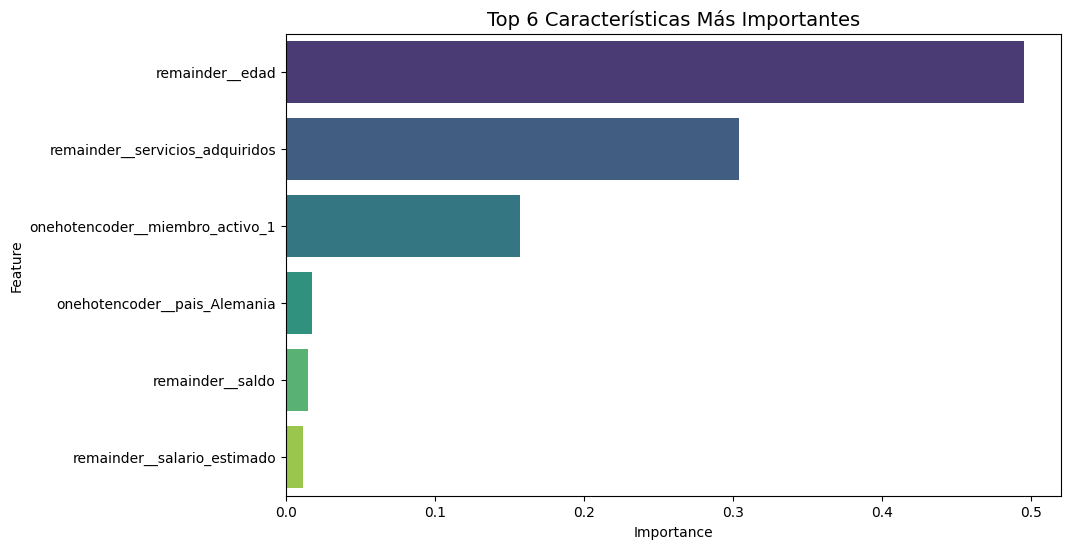

In [ ]:


# Gráfico de barras horizontales
top_n = 6  # Mostrar solo las 15 más importantes
top_features = importance.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f"Top {top_n} Características Más Importantes", fontsize=14)
plt.show()

# 4. Selección de modelos

## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

### Normalizando los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_normalizado, y_train)


KNeighborsClassifier(weights='distance')

In [ ]:
X_test_normalizado = normalizacion.transform(X_test)

In [ ]:
knn.score(X_test_normalizado, y_test)

0.8196

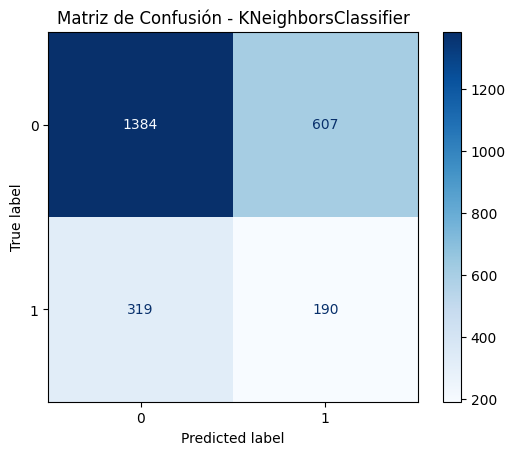

In [ ]:
y_pred = knn.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusión - KNeighborsClassifier")
plt.show()

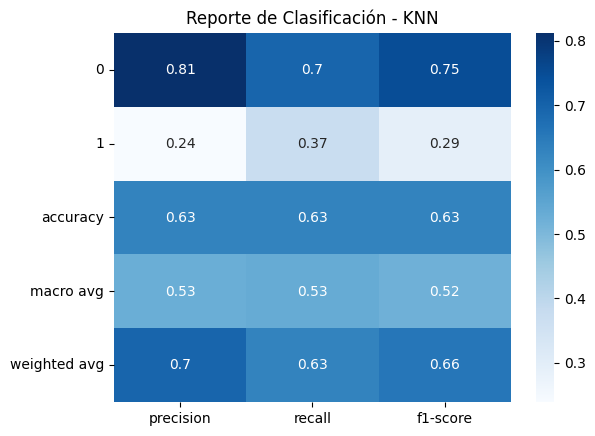

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title("Reporte de Clasificación - KNN")
plt.show()

## Escogiendo y serializando el mejor modelo
Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [ ]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud Dummy: 0.7964
Exactitud modelo_arbol: 0.8464
Exactitud KNN: 0.8196


AttributeError: 'KNeighborsClassifier' object has no attribute 'sumary'

El modelo con mayor exactitud es el Modelo de árbol.

In [ ]:
import pickle

In [ ]:
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [ ]:
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos.

Realizando la lectura de los archivos pickle se utilizan los modelos para hacer la predicción del siguiente registro:

In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_champion.pkl')

In [ ]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [ ]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,850,Francia,Hombre,27,3,56000,1,1,1,85270.0


In [ ]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([0])

Esto indica que la predicción fue el valor 0, que indica que no habrá churn. Por lo tanto, el cliente no dejará de utilizar los servicios.